In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
df=pd.read_csv('TaskA_Dataset.csv')

In [3]:
df

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
lb_make=LabelEncoder()
# train test split
train,test=train_test_split(df,test_size=0.2,shuffle=True)
train_x=pd.DataFrame(np.array(train.iloc[:,2:]))
train_y=pd.DataFrame(np.array(train.iloc[:,1]))
test_x=pd.DataFrame(np.array(test.iloc[:,2:]))
test_y=pd.DataFrame(np.array(test.iloc[:,1]))

#normalize data
train_x=pd.DataFrame(np.array((train_x-train_x.mean())/train_x.std()))
test_x=pd.DataFrame(np.array((test_x-test_x.mean())/test_x.std()))

#convert categorical labels into numerical
train_y=pd.DataFrame(np.array(lb_make.fit_transform(train_y).ravel()))
test_y=pd.DataFrame(np.array(lb_make.fit_transform(test_y).ravel()))

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
#Returns Y=MX+C
def genesis(w,train_x,c):                       
    return np.dot(w.T,train_x.T)+c

#Returns Categorical Cross Entropy Error Err=-sum(Y*log(Y_cap))+((1-Y)*log(1-y_cap)))
def cost_func(train_y,one,pred_y):              
    cross=-(sum(np.dot(train_y.T,np.log(pred_y).T),np.dot((one-train_y).T,np.log(one.T-pred_y).T)))
    print("Cross Entropy Error is:",np.squeeze(cross))
    return cross

#Returns Sigmoid Of The Genesis Equation
def sigmoid1(w,train_x,c):                      
    gen=genesis(w,train_x,c)
    return 1/(1+np.exp(-gen))

#Update Weight Gradient
def grad_weight_update(train_x,train_y,h_init,m):      
    return (-2/m)*(np.dot(train_x.T,(train_y.T-h_init).T))

#Update C Gradient
def grad_c_update(train_x,train_y,h_init,m):           
    return (-2/m)*(train_y.T-h_init)

#Update Weight
def weight_update(w,alpha,train_x,train_y,h_init,m):   
    D_w=grad_weight_update(train_x,train_y,h_init,m)
    return w-alpha*D_w

#Update C
def c_update(c,alpha,train_x,train_y,h_init,m):       
    D_c=grad_c_update(train_x,train_y,h_init,m)
    return c-alpha*D_c

#binarize the probabilistic solutions to calculate accuracy
def binarize(pred_y):                                
    bins = [0,0.5,1]
    group_names = [0,1]
    pred_y=np.array(pred_y)
    return pd.DataFrame(pd.cut(pred_y[0], bins, labels=group_names))

#Confusion Matrix
def performance(train_y,pred_y_binary):            
    tn, fp, fn, tp = confusion_matrix(train_y,pred_y_binary).ravel()
    acc=(tp+tn)/(tp+tn+fp+fn)
    prec=tp/(tp+fp)
    recall=tp/(tp+fn)
    print("The Factors For Train Set Are True-Negative: %s,False-Positive: %s,False-Negative: %s,True-Positive: %s" %(tn,fp,fn,tp))
    print('Accuracy For Train Set Is:',acc)
    print('Precision For Train Set Is:',prec)
    print('Recall For Train Set Is:',recall)
    return acc

 #calculate performance on test data
def test_performance(test_y,pred_y_binary):         
    tn, fp, fn, tp = confusion_matrix(test_y,pred_y_binary).ravel()
    acc=(tp+tn)/(tp+tn+fp+fn)
    prec=tp/(tp+fp)
    recall=tp/(tp+fn)
    print("The Factors For Test Set Are True-Negative: %s,False-Positive: %s,False-Negative: %s,True-Positive: %s" %(tn,fp,fn,tp))
    print('Accuracy For Test Set Is:',acc)
    print('Precision For Test Set Is:',prec)
    print('Recall For Test Set Is:',recall)

#logistic Regression calls sigmoid,weight and c update functions
def logistic_regression(items):                    
    alpha,iterations,m,w,n,c,D_w,D_c=0.001,items,len(train_y),np.zeros([30,1]),30,0,0,0
    for i in range(iterations):
        h_init=sigmoid1(w,train_x,c)
        w=weight_update(w,alpha,train_x,train_y,h_init,m)
        c=c_update(c,alpha,train_x,train_y,h_init,m)
    return w,c,m

# We calculate the Error and the Regression function and the value with the parameters corresponding to the best error function 
# is taken and then using the weights of that many number of epochs we calculate the predicted results for the test set.
# Its observed that the cross entropy error curve stagnates at 9000 epochs upto 15000 epochs. We have calculated the results for 
# no of epochs vs error for all values at an interval of 50 units upto 1500 Epochs and its result is plotted after the function.

#####################################################################################################################
# NOTE:::: CHANGE tot_no_iter to change No Of Epochs. CHANGE VALUE IN THE LIST( PASS tot_no_iter AS A LIST) 
#####################################################################################################################

def main():
    tot_no_iter=[(i+1)*50 for i in range(100)]
    acc,hist_w,hist_c,hist_err=[],[],[],[]
    for no_iter in tot_no_iter:
        w,c,m=logistic_regression(no_iter)
        hist_w.append(pd.DataFrame(np.array(w)))
        hist_c.append(pd.DataFrame(np.array(c)))
        pred_y=sigmoid1(w,train_x,c)
        one=np.ones([m,1])
        print("The Performance For %s Epochs Is As Follows:" %(no_iter))
        cross_error=cost_func(train_y,one,pred_y)
        hist_err.append(cross_error)
        pred_y_binary=binarize(pred_y)
        acc.append(performance(train_y,pred_y_binary))
        print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    index_val=acc.index(max(acc))
    test_w=hist_w[index_val]
    test_c=hist_c[index_val]
    m1=len(test_y)
    one1=np.ones([m1,1])
    c_1=np.squeeze(np.sum(test_c,axis=1)/m)
    c1=np.arange(m1)
    c1.fill(c_1)
    pred_y_test=sigmoid1(test_w,test_x,c1)
    cost_func(test_y,one1,pred_y_test)
    pred_y_test_binary=binarize(pred_y_test)
    test_performance(test_y,pred_y_test_binary)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    plt.rcParams['figure.figsize'] = [17,5]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Accuracy And Cross Entropy Error')
    ax1.plot(tot_no_iter,np.squeeze(hist_err),color='blue')
    ax1.set_title("Cross Entropy Error VS No Of Epochs")
    ax1.set_xlabel("No Of Epochs")
    ax1.set_ylabel("Cross Entropy Error");
    ax2.plot(tot_no_iter,acc,color='blue')
    ax2.set_title("Accuracy VS No Of Epochs")
    ax2.set_xlabel("No Of Epochs")
    ax2.set_ylabel("Accuracy"); 
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")

In [6]:
main()

The Performance For 50 Epochs Is As Follows:
Cross Entropy Error is: 245.79624093303744
The Factors For Train Set Are True-Negative: 260,False-Positive: 18,False-Negative: 16,True-Positive: 160
Accuracy For Train Set Is: 0.9251101321585903
Precision For Train Set Is: 0.898876404494382
Recall For Train Set Is: 0.9090909090909091
--------------------------------------------------------
The Performance For 100 Epochs Is As Follows:
Cross Entropy Error is: 206.3400617908396
The Factors For Train Set Are True-Negative: 262,False-Positive: 16,False-Negative: 16,True-Positive: 160
Accuracy For Train Set Is: 0.9295154185022027
Precision For Train Set Is: 0.9090909090909091
Recall For Train Set Is: 0.9090909090909091
--------------------------------------------------------
The Performance For 150 Epochs Is As Follows:
Cross Entropy Error is: 180.93062166970137
The Factors For Train Set Are True-Negative: 262,False-Positive: 16,False-Negative: 16,True-Positive: 160
Accuracy For Train Set Is: 0.9

The Performance For 1150 Epochs Is As Follows:
Cross Entropy Error is: 80.0316894691968
The Factors For Train Set Are True-Negative: 269,False-Positive: 9,False-Negative: 8,True-Positive: 168
Accuracy For Train Set Is: 0.9625550660792952
Precision For Train Set Is: 0.9491525423728814
Recall For Train Set Is: 0.9545454545454546
--------------------------------------------------------
The Performance For 1200 Epochs Is As Follows:
Cross Entropy Error is: 78.63128225527987
The Factors For Train Set Are True-Negative: 270,False-Positive: 8,False-Negative: 8,True-Positive: 168
Accuracy For Train Set Is: 0.9647577092511013
Precision For Train Set Is: 0.9545454545454546
Recall For Train Set Is: 0.9545454545454546
--------------------------------------------------------
The Performance For 1250 Epochs Is As Follows:
Cross Entropy Error is: 77.3136449400489
The Factors For Train Set Are True-Negative: 270,False-Positive: 8,False-Negative: 8,True-Positive: 168
Accuracy For Train Set Is: 0.964757

KeyboardInterrupt: 

The following graph is the result of calculating accuracy vs no of epochs.
Here we have calculated it upto 15000 epochs by starting from 50 epochs and plotted the accuracy vs no of epochs 
and Cross Entropy Error vs no of epochs.
The total number of iterations was set by tot_no_iter=[(i+1)*50 for i in range(300)]


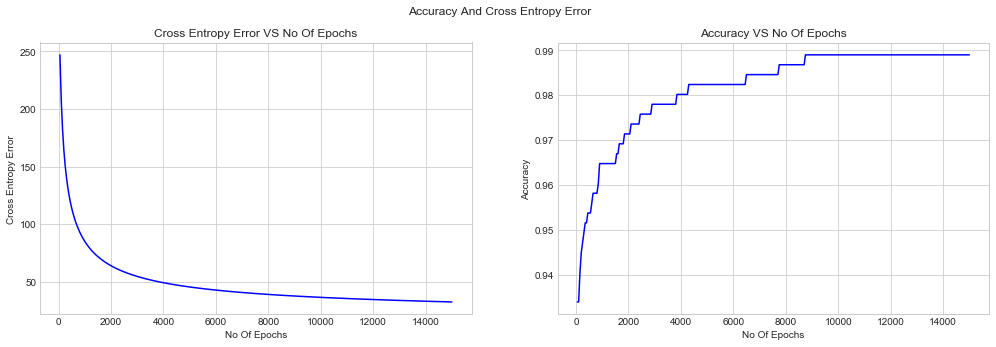

In [1]:
print("The following graph is the result of calculating accuracy vs no of epochs.")
print("Here we have calculated it upto 15000 epochs by starting from 50 epochs and plotted the accuracy vs no of epochs ")
print("and Cross Entropy Error vs no of epochs.")
print("The total number of iterations was set by tot_no_iter=[(i+1)*50 for i in range(300)]")

from IPython.display import Image
Image(filename='download.png')